# 🧠 Análisis Exploratorio de Datos – *Dataset Iris*

**Autor:** Victor Gavilán

**LinkedIn:** [https://www.linkedin.com/in/victorgavilan)

*Proyecto realizado como parte de mi proceso de aprendizaje en **Ciencia de Datos y Machine Learning**, aplicando técnicas de análisis exploratorio, visualización y modelado supervisado con Python.*


---

El **dataset Iris** es un conjunto de datos clásico en el campo de la **ciencia de datos** y el **aprendizaje automático**, utilizado principalmente para tareas de **clasificación multiclase**.  
Fue introducido por el estadístico y biólogo británico **Ronald A. Fisher** en 1936, y se ha convertido en uno de los ejemplos más populares para ilustrar técnicas de análisis y modelado.

---

## 🌸 Descripción del conjunto de datos

El dataset contiene mediciones de **150 flores** pertenecientes a **tres especies** diferentes del género *Iris*:

- *Iris setosa*  
- *Iris versicolor*  
- *Iris virginica*

Cada muestra incluye **cuatro características numéricas** que describen las dimensiones de los pétalos y sépalos:

- **Longitud del sépalo** (*sepal length*)  
- **Anchura del sépalo** (*sepal width*)  
- **Longitud del pétalo** (*petal length*)  
- **Anchura del pétalo** (*petal width*)

---

## 🎯 Objetivo del análisis

El propósito de este **análisis exploratorio de datos (EDA)** es **comprender la estructura del conjunto de datos**, identificar patrones y relaciones entre variables, y obtener una idea general de cómo se distribuyen las características en cada especie.

Este análisis permitirá:

- Detectar posibles **tendencias o correlaciones** entre variables.  
- Identificar **diferencias entre especies**.  
- Evaluar la **distribución** y **dispersión** de cada característica.  
- Preparar el terreno para un **modelo de clasificación supervisado**.
- Entrenamiento con RandomForestClassifier

---


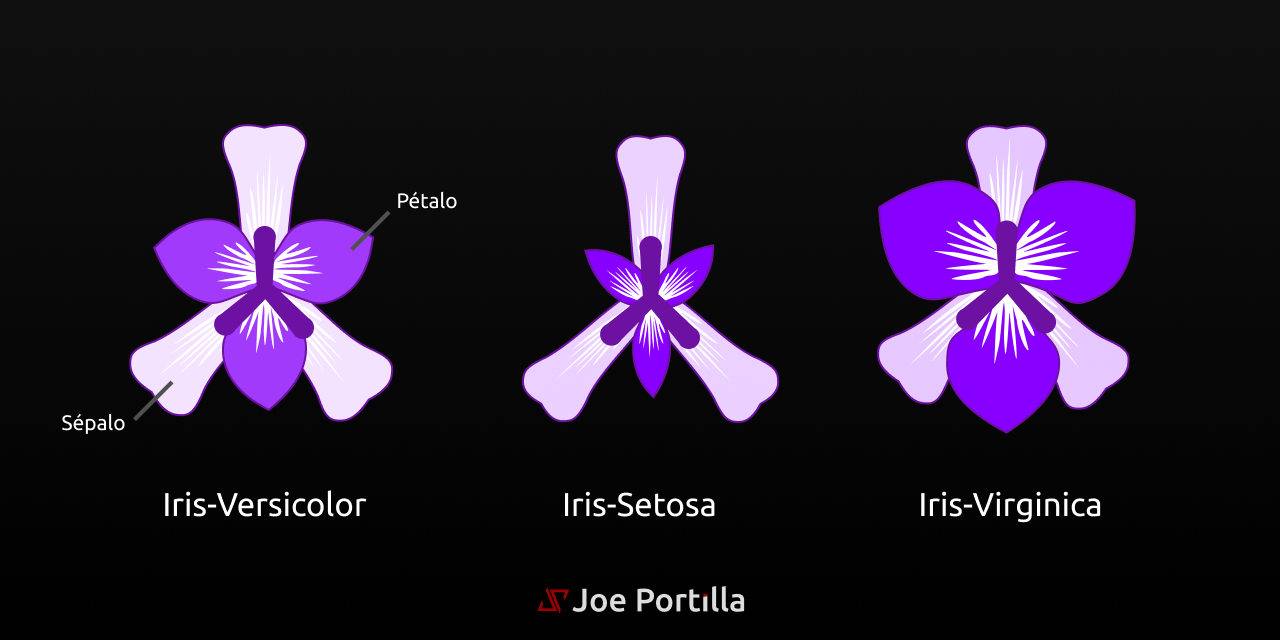

---

## Modelado y Evaluación del Clasificador

Tras el análisis exploratorio, se implementó un modelo supervisado de clasificación utilizando **RandomForestClassifier**, un algoritmo basado en múltiples árboles de decisión que combina precisión y robustez.
El conjunto de datos se dividió en entrenamiento (80 %) y prueba (20 %) para evaluar el desempeño del modelo sobre datos no vistos.

El modelo alcanzó una **exactitud del 100 %** en el conjunto de prueba, clasificando correctamente todas las observaciones de las tres especies. Este resultado evidencia que las clases están claramente separadas en el espacio de características, lo que facilita la tarea de clasificación.

Se generaron métricas de evaluación (precisión, recall, F1-score) y se **incorporaron visualizaciones** interactivas para interpretar los resultados:

- Un gráfico 2D interactivo mostrando las predicciones frente a los valores reales.

- Un gráfico de importancia de características, donde se destaca que la    longitud y anchura del pétalo son las variables más relevantes para distinguir entre especies.

---

## Conclusión

El modelo demostró una **capacidad predictiva perfecta**, validando la alta separabilidad entre las especies del género Iris.
Este proyecto permitió recorrer todo el flujo de trabajo de un problema clásico de Machine Learning: desde el análisis exploratorio y la comprensión de los datos, hasta el entrenamiento, evaluación y explicación de un modelo predictivo.

A través de este ejercicio, se evidenció la importancia de una exploración inicial sólida, la correcta elección de atributos y el uso de herramientas visuales para comunicar de forma efectiva los resultados obtenidos.

# 1. Ajustes Iniciales

### 1.1 Importación de Bibliotecas

In [49]:
# Trabajar con los datos
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



### 1.2 Definición de estilo de gráficas

In [4]:

# estilos de graficos
sns.set_theme(style="whitegrid") 


# 2. Carga y Preprocesamiento del Dataset

### 2.1 Lectura de CSV

In [5]:
# Cargamos el dataframe
df =  pd.read_csv('Iris.csv')

### 2.2 Preprocesamiento

**Renombramiento de columnas** <br>

Se renombraran las columnas para facilitar el uso.


In [6]:
# Renombrar variables en mi caso lo haré en español

df.rename(columns={
    'SepalLengthCm' : 'longitud_sepalo',
    'SepalWidthCm'  : 'anchura_sepalo',
    'PetalLengthCm' : 'longitud_petalo',
    'PetalWidthCm'  : 'anchura_petalo',
    'Species' : 'especies'},
    inplace=True)

df

,Id,longitud_sepalo,anchura_sepalo,longitud_petalo,anchura_petalo,especies
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Eliminación del columnas** <br>

Se elimina la columna 'Id', ya que dentro de este análisis es innecesario.

In [7]:
# Eliminamos la columna id

df.drop('Id', axis=1, inplace= True)
df

,longitud_sepalo,anchura_sepalo,longitud_petalo,anchura_petalo,especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Formatear Columna** <br>

Se formateará la columna species para eliminar la palabra redundante *"Iris-"* en los nombres de las especies.


In [8]:

df['especies'] = df['especies'].str.replace('Iris-','',regex=False)

**Resultado del dataframe procesado**

In [9]:
df.head()

,longitud_sepalo,anchura_sepalo,longitud_petalo,anchura_petalo,especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Exploración Inicial 

**Dimensión del dataframe**

In [10]:
# Filas y Columna
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")



El DataFrame tiene 150 filas y 5 columnas.


**Balance de dataframe**

- El dataframe esta balanceado, todas las especies cuentan con *50 datos*.

In [11]:
df['especies'].value_counts()

especies
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

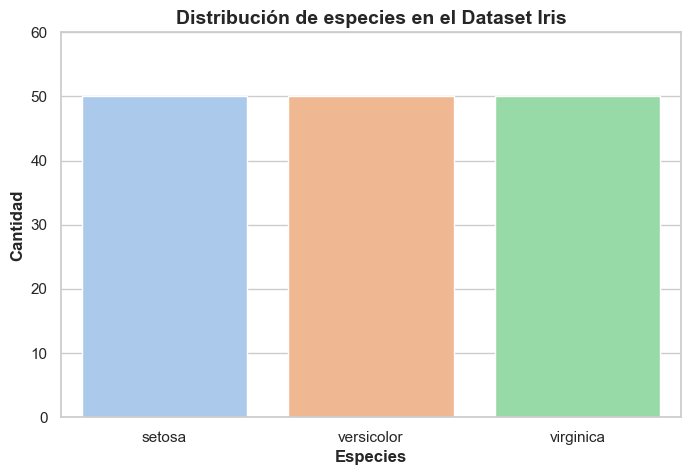

In [12]:
# Canvas
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

# Grafico
ax = sns.countplot(
    data= df,
    x='especies',
    palette='pastel',
    hue='especies',
    legend=False
)

#Labels

plt.title('Distribución de especies en el Dataset Iris', fontsize=14 , fontweight='bold')
plt.xlabel('Especies', fontsize= 12, fontweight='semibold' )
plt.ylabel('Cantidad', fontsize= 12, fontweight='semibold')

#Ajustes visuales


plt.xticks(rotation=0)
plt.ylim(0, df['especies'].value_counts().max() + 10) 
plt.show()


**Comprobación de valores faltantes**

El dataset está completo no cuenta con valores faltantes

In [13]:
df.isnull().sum()

longitud_sepalo    0
anchura_sepalo     0
longitud_petalo    0
anchura_petalo     0
especies           0
dtype: int64

**Información General del Dataset**

- 4 columnas son de tipo float
- 1 columna es de tipo categorica que corresponde al de la especies
- No hay valores nulos

In [14]:
info_tabla = pd.DataFrame({
    'Tipo de dato': df.dtypes,
    'Valores no nulos': df.count(),
    'Valores nulos': df.isna().sum(),
    'Valores únicos': df.nunique()
})

info_tabla


,Tipo de dato,Valores no nulos,Valores nulos,Valores únicos
longitud_sepalo,float64,150,0,35
anchura_sepalo,float64,150,0,23
longitud_petalo,float64,150,0,43
anchura_petalo,float64,150,0,22
especies,object,150,0,3


**Estimación de asimetría ( Skewness ) y Estimación de la curtosis**

In [15]:
resumen = pd.DataFrame({
    'Asimetría (Skew)': df.select_dtypes(include='number').skew(),
    'Curtosis (Kurtosis)': df.select_dtypes(include='number').kurt()
})

# Función para interpretar skew
def interpretar_skew(x):
    if x > 1:
        return "Asimetría positiva fuerte (cola derecha)"
    elif x > 0.5:
        return "Asimetría positiva moderada"
    elif x > 0.1:
        return "Asimetría positiva leve"
    elif x < -1:
        return "Asimetría negativa fuerte (cola izquierda)"
    elif x < -0.5:
        return "Asimetría negativa moderada"
    elif x < -0.1:
        return "Asimetría negativa leve"
    else:
        return "Distribución simétrica"

# Función para interpretar kurtosis (Fisher)
def interpretar_kurt(x):
    if x > 1:
        return "Leptocúrtica (punta alta, más outliers)"
    elif x < -1:
        return "Platicúrtica (achatada, menos outliers)"
    else:
        return "Mesocúrtica (similar a normal)"

# Aplicar las interpretaciones
resumen['Interpretación Skew'] = resumen['Asimetría (Skew)'].apply(interpretar_skew)
resumen['Interpretación Kurtosis'] = resumen['Curtosis (Kurtosis)'].apply(interpretar_kurt)

# Mostrar tabla final
resumen.round(3)


,Asimetría (Skew),Curtosis (Kurtosis),Interpretación Skew,Interpretación Kurtosis
longitud_sepalo,0.315,-0.552,Asimetría positiva leve,Mesocúrtica (similar a normal)
anchura_sepalo,0.334,0.291,Asimetría positiva leve,Mesocúrtica (similar a normal)
longitud_petalo,-0.274,-1.402,Asimetría negativa leve,"Platicúrtica (achatada, menos outliers)"
anchura_petalo,-0.105,-1.340,Asimetría negativa leve,"Platicúrtica (achatada, menos outliers)"


**Gráficos de las estimaciones**

En general, las cuatro variables del dataset Iris presentan distribuciones aproximadamente normales, con leves asimetrías y curtosis bajas. Esto sugiere que el dataset está bien balanceado y listo para el análisis comparativo y modelado.

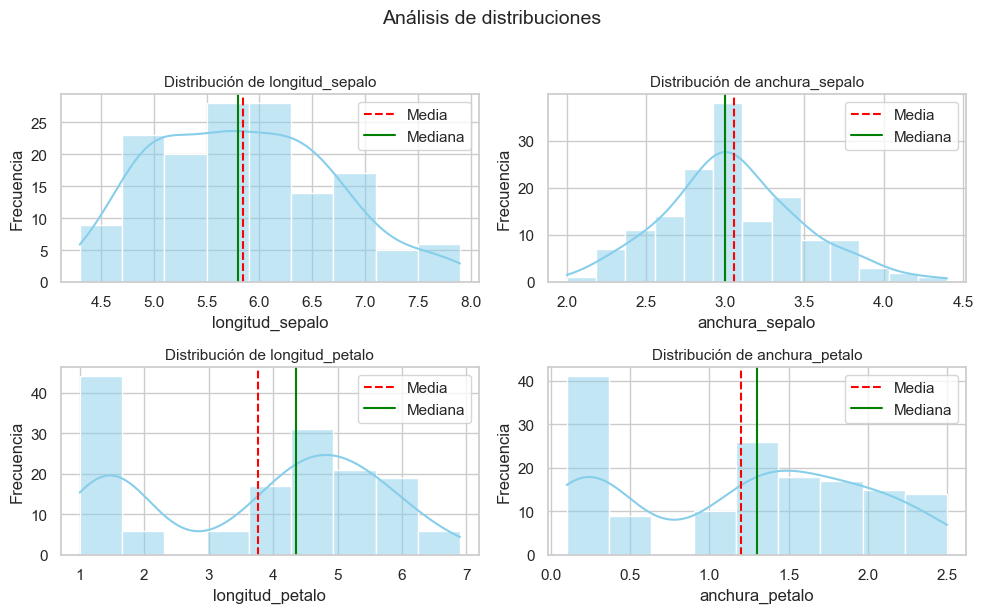

In [16]:
columnas = ['longitud_sepalo','anchura_sepalo','longitud_petalo','anchura_petalo']

plt.figure(figsize=(10, 6))
plt.suptitle("Análisis de distribuciones", fontsize=14, y=1.02)

for i, col in enumerate(columnas, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribución de {col}", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Mediana')
    plt.legend()

plt.tight_layout()
plt.show()

# 4. Análisis Univariado

### 4.1 Estadisticas de cada columna numérica

In [17]:
df.describe()

,longitud_sepalo,anchura_sepalo,longitud_petalo,anchura_petalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 4.2 Longitud del sépalo [cm]

En la **longitud del sépalo**, se observan **dos picos** principales alrededor de **5.5 cm y 6.5 cm**, donde se concentran las **frecuencias más altas**.

La **media (5.8 cm)** y la mediana se encuentran próximas, lo que indica una distribución aproximadamente **simétrica**, con leve tendencia a la normalidad.

**No** se evidencian **asimetrías** marcadas ni **valores atípicos** significativos, reflejando una forma balanceada y homogénea.

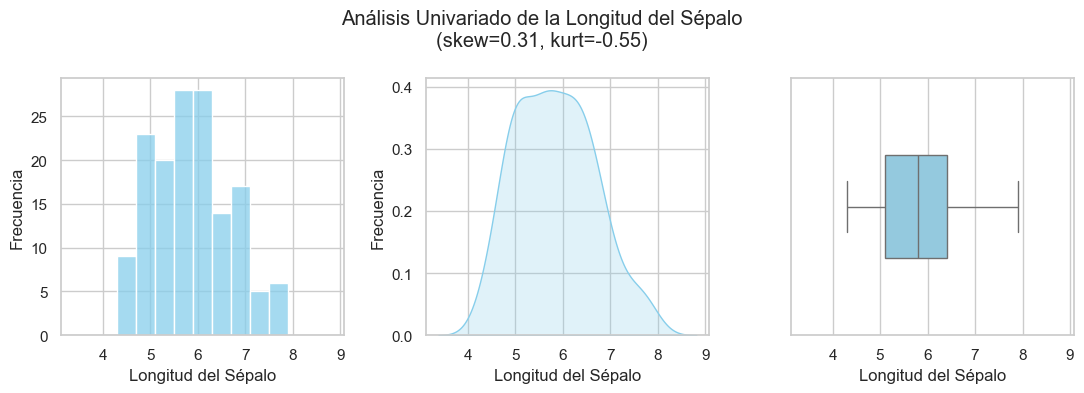

In [18]:
columna = 'longitud_sepalo'
columna_titulo = 'Longitud del Sépalo'

# Ajustes de la figura de Matplotlib

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharex=True)


# Plot histograma

sns.histplot(data=df[columna], ax=ax[0], kde=False, color= 'skyblue')
ax[0].set_xlabel(columna_titulo)
ax[0].set_ylabel('Frecuencia')

# Plot curva de densiad

sns.kdeplot(data=df[columna], ax=ax[1], fill=True, color='skyblue')
ax[1].set_xlabel(columna_titulo)
ax[1].set_ylabel('Frecuencia')

# Plot boxplot

sns.boxplot(data=df[columna], ax=ax[2], orient='h', width=0.4, color='skyblue')
ax[2].set_xlabel(columna_titulo)
ax[2].set_ylabel('')

plt.suptitle(f"Análisis Univariado de la {columna_titulo}\n(skew={df[columna].skew():.2f}, kurt={df[columna].kurt():.2f})")


plt.tight_layout()



### 4.3 Ancho del sépalo [cm]

En la **Anchura del sépalo**, la mayor concentración de observaciones se encuentran en **3.0 cm**, donde se registra la frecuencia más alta de todo el conjunto.

La **mediana**, se ubica en **3.0cm**, lo que indica una distribución centrada y equilibrada en torno al valor medio.

En la **curva de densidad** se aprecia un **pico pronunciado**, característico de una **distribución leptocúrtica (kurtosis positiva)**.

Además, en el **boxplot** muestra algunos **valores atípicos** en los extremos, lo que indica cierta dispersión en los valores más bajos y altos.

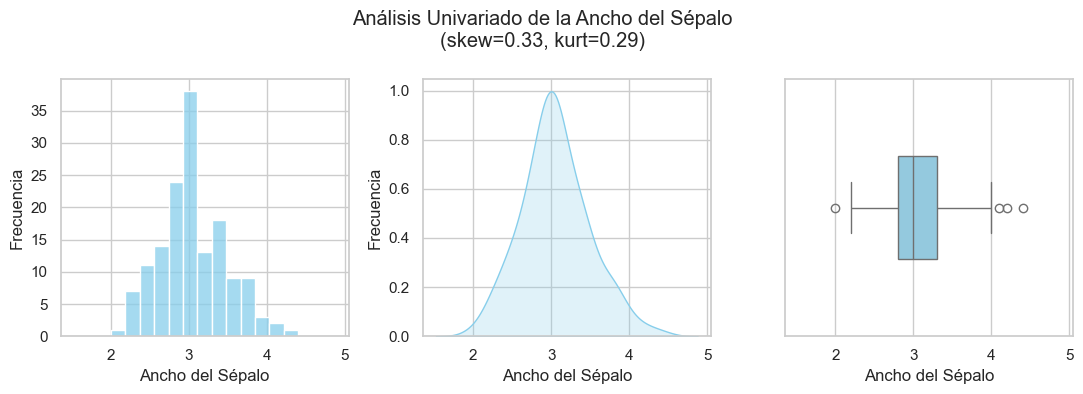

In [19]:
columna = 'anchura_sepalo'
columna_titulo = 'Ancho del Sépalo'

# Ajustes de la figura de Matplotlib

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharex=True)


# Plot histograma

sns.histplot(data=df[columna], ax=ax[0], kde=False, color= 'skyblue')
ax[0].set_xlabel(columna_titulo)
ax[0].set_ylabel('Frecuencia')

# Plot curva de densiad

sns.kdeplot(data=df[columna], ax=ax[1], fill=True, color='skyblue')
ax[1].set_xlabel(columna_titulo)
ax[1].set_ylabel('Frecuencia')

# Plot boxplot

sns.boxplot(data=df[columna], ax=ax[2], orient='h', width=0.4, color='skyblue')
ax[2].set_xlabel(columna_titulo)
ax[2].set_ylabel('')

plt.suptitle(f"Análisis Univariado de la {columna_titulo}\n(skew={df[columna].skew():.2f}, kurt={df[columna].kurt():.2f})")


plt.tight_layout()

### 4.4 Longitud del pétalo [cm]

En la **longitud del pétalo**, la mayor concentración de observaciones se ubica alrededor de **1.5cm**, donde se registra la frecuencia más alta.

La **mediana (4.3 cm)** se ubica entre los **dos grupos** principales, reflejando el punto medio de una distribución **bimodal**.

No se observan **valores atípicos**, sin embargo,la **presencia de dos picos principales** en la curva de densidad sugiere una **distribución bimodal**, típica de datasets con clases distintas( en este caso, las especias de Iris).

Debido a su forma multimodal, la **distribución no sigue un patrón normal**, y presenta una **leve asimetría negativa** (skew = –0.27), reflejando una ligera concentración hacia valores más altos.

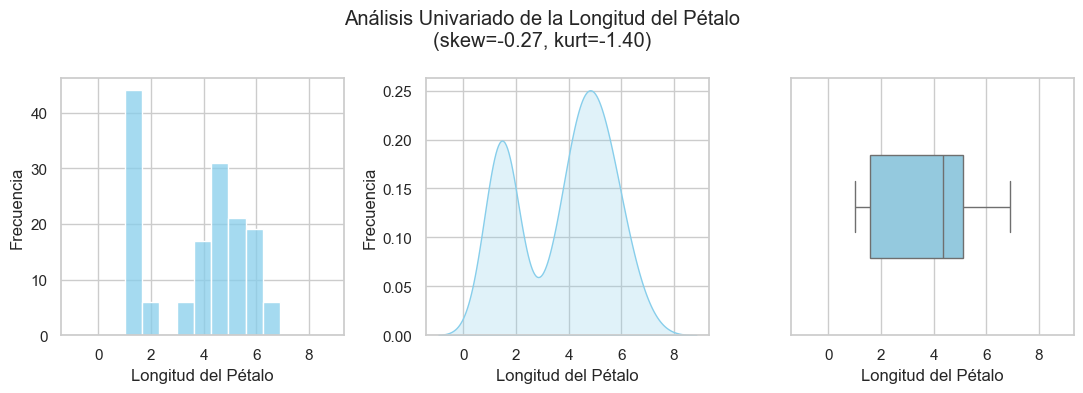

In [20]:
columna = 'longitud_petalo'
columna_titulo = 'Longitud del Pétalo'

# Ajustes de la figura de Matplotlib

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharex=True)


# Plot histograma

sns.histplot(data=df[columna], ax=ax[0], kde=False, color= 'skyblue')
ax[0].set_xlabel(columna_titulo)
ax[0].set_ylabel('Frecuencia')

# Plot curva de densiad

sns.kdeplot(data=df[columna], ax=ax[1], fill=True, color='skyblue')
ax[1].set_xlabel(columna_titulo)
ax[1].set_ylabel('Frecuencia')

# Plot boxplot

sns.boxplot(data=df[columna], ax=ax[2], orient='h', width=0.4, color='skyblue')
ax[2].set_xlabel(columna_titulo)
ax[2].set_ylabel('')

plt.suptitle(f"Análisis Univariado de la {columna_titulo}\n(skew={df[columna].skew():.2f}, kurt={df[columna].kurt():.2f})")


plt.tight_layout()

### 4.5 Ancho del pétalo [cm]

En la **Anchura del pétalo**, se observa una **distribución bimodal**, similar a la de la longitud del pétalo, con **dos picos principales**, uno cercano al **0.5 cm** y otro alrededor de **1.5 cm**.

Las **mayores frecuencias** en estos puntos reflejan la presencia de **dos grupos de observaciones**, asociadas a especies con pétalos más cortos y más anchos.

La **media (1.3cm)** y la **mediana** se encuentran próximas, lo que indica una **distribución casi simétrica**, con **leve asimetría negativa**.

No se observan **valores atípicos**, y la **curtosis negativa** sugiere una **distribución achatada**, con menor concentración central respecto a una normal.

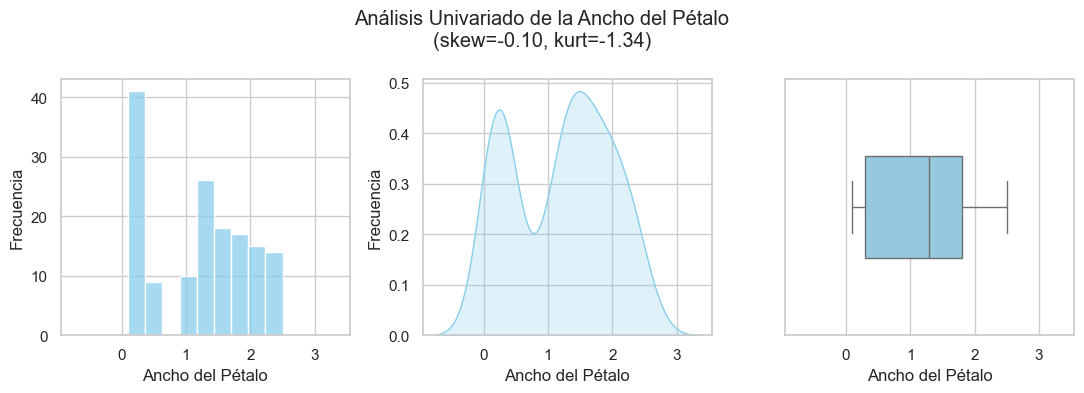

In [21]:
columna = 'anchura_petalo'
columna_titulo = 'Ancho del Pétalo'

# Ajustes de la figura de Matplotlib

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharex=True)


# Plot histograma

sns.histplot(data=df[columna], ax=ax[0], kde=False, color= 'skyblue')
ax[0].set_xlabel(columna_titulo)
ax[0].set_ylabel('Frecuencia')

# Plot curva de densiad

sns.kdeplot(data=df[columna], ax=ax[1], fill=True, color='skyblue')
ax[1].set_xlabel(columna_titulo)
ax[1].set_ylabel('Frecuencia')

# Plot boxplot

sns.boxplot(data=df[columna], ax=ax[2], orient='h', width=0.4, color='skyblue')
ax[2].set_xlabel(columna_titulo)
ax[2].set_ylabel('')

plt.suptitle(f"Análisis Univariado de la {columna_titulo}\n(skew={df[columna].skew():.2f}, kurt={df[columna].kurt():.2f})")


plt.tight_layout()

# 5. Análisis Bivariado

#### 5.1 Relación entre la longitud y la anchura del pétalo por especie


Se observa una **dispersión ascendente clara**, que indica una **relación positiva fuerte** entra la **longitud** y la **anchura** del pétalo:
a medida que los pétalos son más largos, también tienden a ser **más anchos**

Además, los puntos se agrupan en **tres zonas bien definidas**, correspondientes a las **tres especies** del conjunto Iris:

 - **Iris setosa:** se ubica en la zona **inferior izquierda**, con **pétalos más cortos y delgados**, siendo la especie **más pequeña** del conjunto.

 - **Iris versicolor:** ocupa la **zona intermedia**, con **pétalos de longitud y anchura mayores** que *setosa*, pero **menores** que *virginica*

 - **Iris virginica:** aparece en **parte superior derecha**, con **pétalos más largos y anchos**, lo que la convierte en la especie con **mayores dimensiones florales**.

 El gráfico evidencia una **correlación positiva fuerte** y una **clara separación entre especies**, lo que sugiere quee stas dos variables son **buenas predictoras** para distinguir las flores.

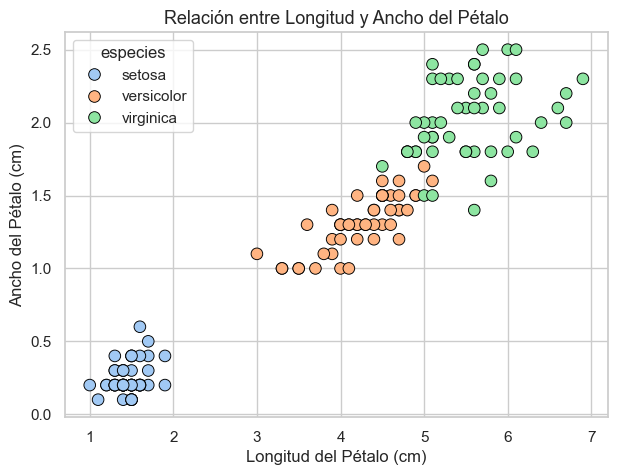

In [22]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data= df,
    x='longitud_petalo',
    y='anchura_petalo',
    hue='especies',
    palette='pastel',
    s=70,
    edgecolor='black'
)

plt.title('Relación entre Longitud y Ancho del Pétalo', fontsize=13)
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')

plt.grid(True)
plt.show()

#### 5.2 Relación entre la longitud y la anchura del sépalo por especie


No se observa una **relación clara** entre **longitud y anchura** del sépalo.

los puntos se distribuyen de forma **dispersa**, sin seguir un patrón definido,
y **no se identifican agrupaciones marcadas** entre especies,
excepto *Iris setosa*, que presenta **valores más centrados y diferenciados**.
La **correlación es lineal, positiva y débil**.

lo que indica que el **aumento en la longitud del sépalo apenas influye en su anchura.

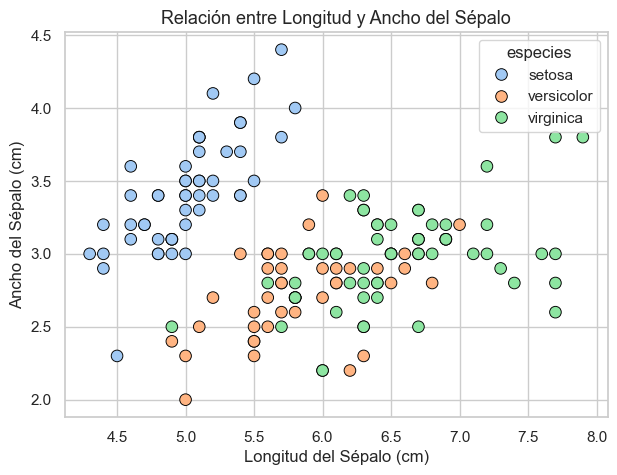

In [23]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data= df,
    x='longitud_sepalo',
    y='anchura_sepalo',
    hue='especies',
    palette='pastel',
    s=70,
    edgecolor='black'
)

plt.title('Relación entre Longitud y Ancho del Sépalo', fontsize=13)
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')

plt.grid(True)
plt.show()

#### 5.3 Relación entre la longitud del sépalo y la anchura del pétalo por especie


Se observan **agrupaciones claras**, aunque **con cierta dispersión** dentro de cada grupo.

- **Iris setosa** presenta **sépalos más cortos** y **pétalos más pequeños**, ubicándose en la zona **inferior izquierda** del gráfico.

- **Iris versicolor** ocupa la **zona intermedia**, con **longitudes de sépalo y pétalo mayores** que las de *setosa*, pero **menores** que las de *virginica*.

- **Iris virginica** se concentra en la **zona superior derecha**, con las **mayores longitudes** de sépalo y pétalo del conjunto.

Aunque la **variación** en las longitudes no es excesiva, se aprecia un **patrón ascendente claro**,
lo que indica una **correlación positiva moderada a fuerte**.

Esta relación, junto con los **agrupamientos definidos**, sugiere que estas variables pueden ser **útiles para el modelamiento y la clasificación e especies**.

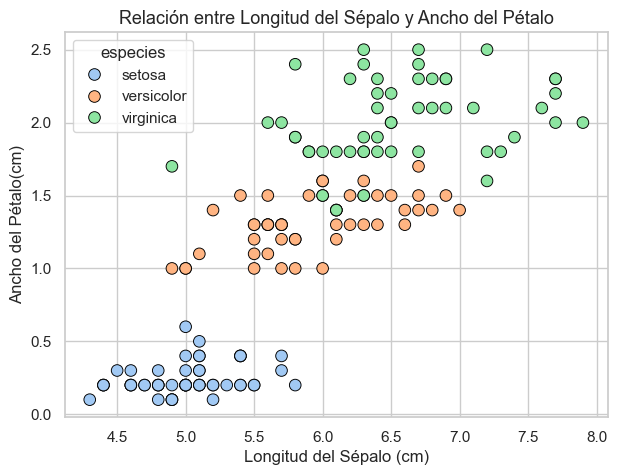

In [24]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data= df,
    x='longitud_sepalo',
    y='anchura_petalo',
    hue='especies',
    palette='pastel',
    s=70,
    edgecolor='black',

)

plt.title('Relación entre Longitud del Sépalo y Ancho del Pétalo', fontsize=13)
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Pétalo(cm)')

plt.grid(True)
plt.show()

# 6. Análisis multivariado

### 6.1 Heatmap de Correlaciones (mapa de calor)

En el **Heatmap**, se observan varias **relaciones positivas fuertes**, especialmente entre las variables de los **pétalos**, lo que indica que **crecen en conjunto**.

- La **longitud del pétalo** y la **anchura del pétalo** presentan la **correlación más alta (0.96)**, evidenciando una **relación positiva fuerte:**
a medida que los pétalos son más largos, tambien tienden a ser más anchos.

- La **longitus del sépalo** muestra **correlaciones positivas moderadas-fuertes** con ambas variables del pétalo:
    - **con la longitud del pétalo (0.87)**,
    - **con la anchura del pétalo (0.82)**.
    **Esto sugiere que las flores con pétalos más largos suelen tener pétalos más grandes.**

- En cambio, la **anchura del sépalo** se correlaciona **débilmente** con el resto de las variables,

e incluso presenta **valores negativos leves** con medidas del los pétalos, lo que indica una **relación inversa débil**:
a mayor anchura del sépalo, ligeramente menores tienen a ser las dimensiones del pétalo.

En conjunto, con el mapa de calor confirma que las **variables del pétalo** son las que presentan **mayor interrelación** y aportan **más información útil** para el análisis y la clasificación de las especies.


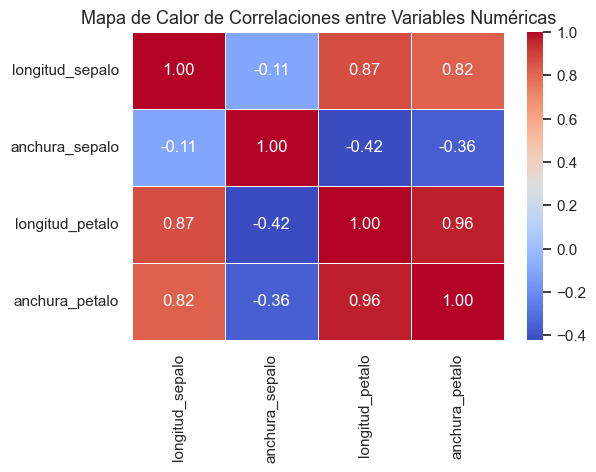

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df.select_dtypes(include='number').corr(), 
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5
)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas', fontsize=13)
plt.show()



### 6.2 Pairplot (matriz de dispersión)

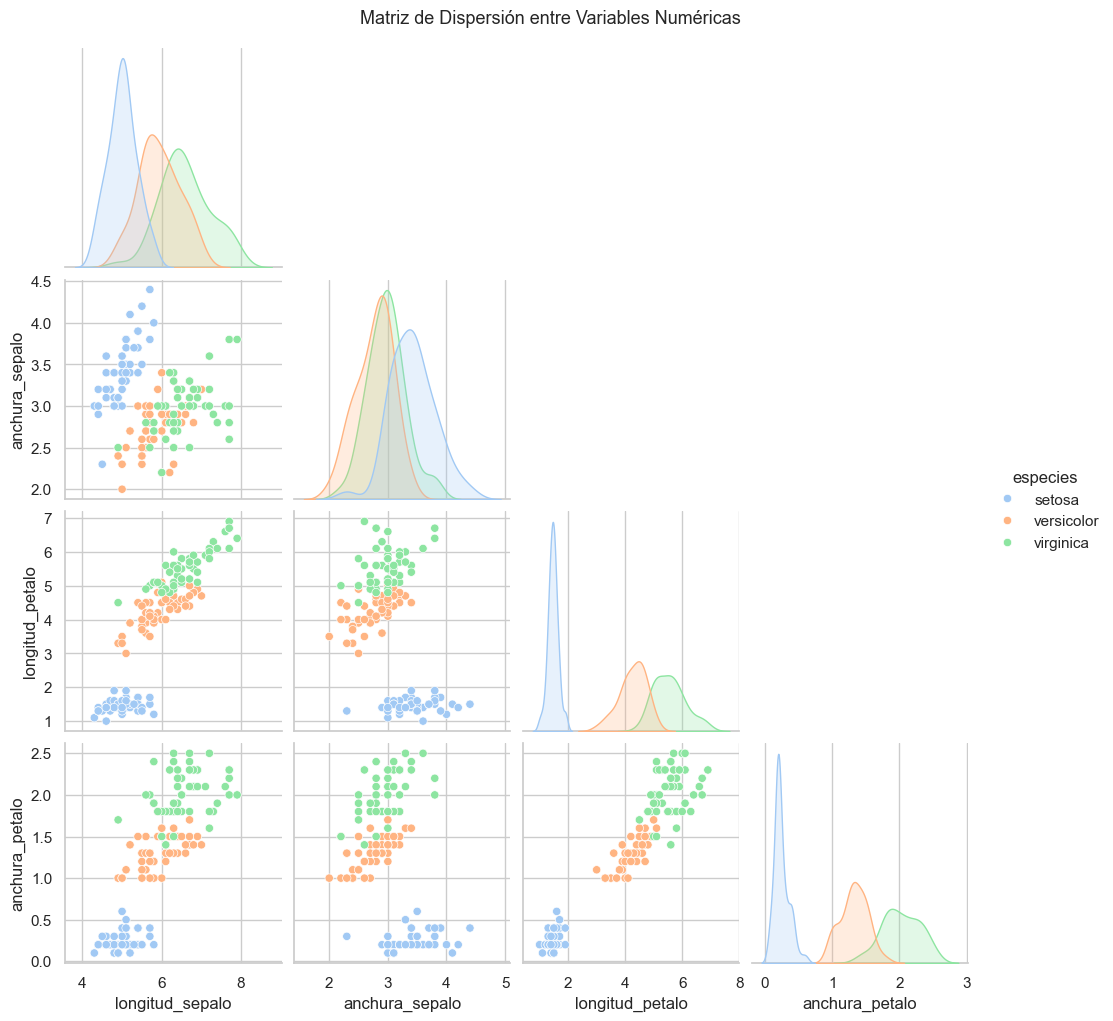

In [26]:
sns.pairplot(
    df,
    hue='especies',
    corner= True,
    palette= 'pastel',
    diag_kind='kde'
)

plt.suptitle('Matriz de Dispersión entre Variables Numéricas', y= 1.02, fontsize=13)
plt.show()

# 7 Conclusiónes Final del Análisis Exploratorio 

El análisis exploratorio realizado sobre el **dataset Iris** permitió comprender en profundidad la estructura y comportamiento de las variables que describen las tres especies de flores (*Iris setosa, Iris versicolor e Iris virginica*).

A nivel **univariado**, las variables mostraron distribuciones **principalmente unimodales y simétricas**, con algunas diferencias entre especies. Destacaron las **característicasde los pétalos**, las cuales presentaron una **mayor variabilidad** y **valores más diferenciados**,
facilitando su uso para distinguir entre clases.

En el **análisis bivariado**, se observarion **relaciones positivas fuertes** entre las dimensiones del pétalo, especialmente entre **longitud y anchura (r ≈ 0.96)**. También se identificaron **correlaciones moderadas** entre las longitudes del sépalo y pétalo,
mientras que la **anchura del sépalo** mostró **relaciones débiles o negativas** con el resto de variables. Estas asociaciones sugieren que los pétalos **crecen de forma proporcional** y son más **representativos para la clasificación.**

Finalmente, el **análisis multivariado**, a través del **Heatmap y el Pairplot,** confirmó que las **variables del pétalo** son las **más discriminantes**, evidenciando **agrupamientos claros por especie**, donde *Iris setosa* se diferencia con nitidez. *versicolor y virginica* presentan un **solapamiento parcial**.

En conjunto, los resultados del EDA evidencian que las dimensiones de los **pétalos** son las **variables más relevantes** para un futuro **modelo de clasificación supervisado**, mientras que las del **sépalo**, aunque informativas, tienen **menor poder predictivo**. Este análisis sienta una base sólida para la siguiente etapa del proyecto: el **modelado y evaluación de desempeño.**

# Implementacion del modelo

**Importación del modelo RandomForestClassifier**



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:

X = df[['longitud_sepalo','anchura_sepalo','longitud_petalo', 'anchura_petalo']]
y= df['especies']

# Dividimos Datos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Creacion del Modelo

model = RandomForestClassifier(random_state=42)

# Entrenar Modelo

model.fit(X_train,y_train)

# Prediciones

y_pred = model.predict(X_test)

# Evaluacion

print('Exactitud:', accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=model.classes_))

Exactitud: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [70]:

df_resultados = X_test.copy()
df_resultados['Real'] = y_test.values
df_resultados['Predicho'] = y_pred

fig = px.scatter(
    df_resultados,
    x='longitud_petalo',
    y='anchura_petalo',
    color='Predicho',           
    symbol='Real',               
    title='Predicciones del modelo vs valores reales',
    hover_data=['longitud_petalo', 'anchura_petalo']
)

fig.update_layout(template='plotly_white', title_x=0.5)
fig.show()

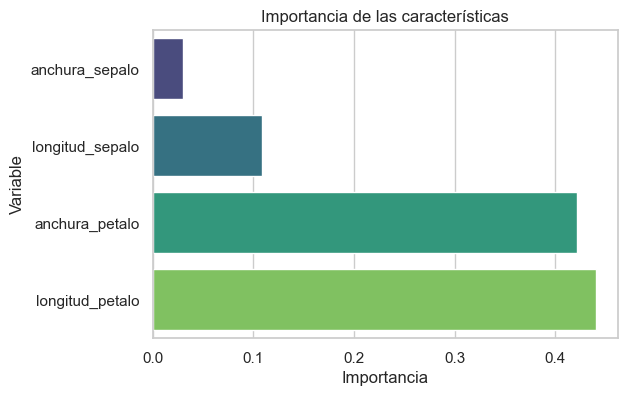

In [ ]:
importancia = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(6,4))
sns.barplot(
    data=importancia.reset_index(),
    x=0,
    y='index',
    hue='index',              
    palette='viridis',
    legend=False              
)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

El modelo **RandomForestClassifier** logró una **exactitud del 100%** en el conjunto de prueba, clasificando correctamente las tres espeies de Iris: *Setosa, Versicolor y Virginica*.

El gráfico *'Predicciones del modelo vs valores reales'* muestra que las especies están claramente separadas según sus características morfológicas, lo cual facilita la tarea de clasificación.

Además, la importancia de características confirma que las dimensiones del pétalo son las más determinantes en la predicción.

Este proyecto muestra el flujo completo de un modelo de Machine LearningL desde la exploración y visualización de datos hasta la evaluación y explicación de resultados.